In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
#processing one hot encoding
df=pd.get_dummies(df,drop_first=True)
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,False,True
1,162597.70,151377.59,443898.53,191792.06,False,False
2,153441.51,101145.55,407934.54,191050.39,True,False
3,144372.41,118671.85,383199.62,182901.99,False,True
4,142107.34,91391.77,366168.42,166187.94,True,False


In [4]:
#coverting boolean data type to integer
df=df.astype(int)
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349,136897,471784,192261,0,1
1,162597,151377,443898,191792,0,0
2,153441,101145,407934,191050,1,0
3,144372,118671,383199,182901,0,1
4,142107,91391,366168,166187,1,0


In [5]:
#creating variable for y_train and y_test
independent=df[['R&D Spend','Administration','Marketing Spend','State_Florida','State_New York']]

In [6]:
#creating variable for y_train and y_test
dependent=df[['Profit']]

In [7]:
#importing train_test_split for training
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(independent,dependent,test_size=0.30,random_state=0)

In [35]:
#model creation
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion='absolute_error')
regressor=regressor.fit(x_train,y_train)

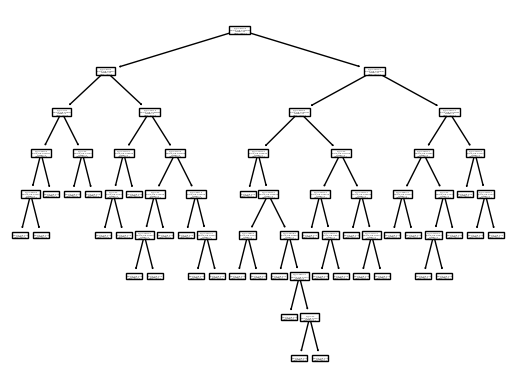

In [41]:
#vizualizing the distribution of data
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [36]:
#assigning to y_pred
y_pred=regressor.predict(x_test)

In [37]:
#evaluating with r2_score
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)
r_score

0.9360138093671287

In [38]:
#saving model
import pickle 
filename='finalized_Decision_Tree_model.sav'
pickle.dump(regressor,open(filename,'wb'))

In [39]:
load_model=pickle.load(open('finalized_Decision_Tree_model.sav','rb'))
result=load_model.predict([[1234,200,123,1,0]])

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [40]:
#predicting the output
result

array([49490.])